In [ ]:
Deadline for assignment: 14. Juli 

#### Assignment prediction bundesliga

Write a function for the Bundesliga Preditor (into the ipython notebook) to compute the distribution how many goals  team with id1 scores against team with id2.

    def get_goal_distribution(...)

The function should return a numpy array with the probabilities, e.g.
    > array([  7.52266366e-02,   1.87908528e-01,   2.41195214e-01,
         2.11872586e-01,   1.43138234e-01,   7.92529601e-02,
         3.74274244e-02,   1.54933669e-02,   5.73442687e-03,
         1.92632176e-03,   5.94202661e-04,   1.69885586e-04,
         4.53615301e-05,   1.13827229e-05,   2.69837689e-06,
         6.06977959e-07,   1.30043093e-07,   2.66221362e-08,
         5.22209646e-09,   9.83872176e-10])
         
The first entry is the probability that the team_1 scores no goals (here .52266366e-02).    
The second entry is the probability that the team_1 scores one goal (here 1.87908528e-01).    
...

#### Assigment ATP Tennis Scoring

In this assignment, you’ll be using the (binary) results of the 2011 ATP men’s tennis singles for 107 players
in a total of 1801 games (which these players played against each other in the 2011 season), to compute
probabilistic rankings of the skills of these players.


#### Data

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import pymc
import operator

In [53]:
tennis_players = np.load("./tennis_players.npy")
nb_tennis_players = len(tennis_players)
burn = nb_tennis_players/2

In [4]:
#tennis_players

In [5]:
tennis_games = np.load("./tennis_games.npy")
#tennis_games.shape

tennis_games is a 1801 by 2 matrix of the played games, one row per
game: the first column is the identity of the player who won the game, and the second column contains the
identity of the player who lost. 

#### Assignment

1. Use pymc to develop a probabilistic ranking system. The model should assign each player a score. 
2. Plot the ranking accoring to your (learnt) model.
3. Write a function which get's as input the ids of two player and prints (or returns) a prediction of the probabilities that player 1 resp. player 2 wins.
e.g.:
       > print_prediction(10, 12)   
       
       Andy-Murray: 0.56
       David-Nalbandian: 0.44

In [90]:
# get wincount for every player
# http://www.python-kurs.eu/lambda.php
map_winners = map(lambda x : x[0], tennis_games)
# Count number of occurrences of each value in array
wins_per_player = np.bincount(map_winners)
# adding two entries with 0, meaning two player didn't win any games,
# so we have an even array list (wins and losses)
wins_per_player = np.append(wins_per_player, 0)
wins_per_player = np.append(wins_per_player, 0)


In [91]:
# get loose count for every player
map_losers = map(lambda x : x[1], tennis_games)
losses_per_player = np.bincount(map_losers)

In [92]:
# calculating games played using wins + losses for every player
games_played = wins_per_player + losses_per_player

In [93]:
# storing win loose count for every player in a dictionary
players = {}
for w, l in tennis_games:
    if(w in players):
        winner = players[w]
    else:
        winner = (0,0)
        
    winner = (winner[0] + 1, winner[1])
    players[w] = winner
    
    if(l in players):
        loser = players[l]
    else:
        loser = (0,0)
        
    loser = (loser[0], loser[1] + 1)
    players[l] = loser
    

            

In [94]:
# adding total game count
# output: wins, losses, total game count
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[0]+v[1])), players.iteritems() ))


In [100]:
# player score(winrate) based on number of wins divided by number of games played
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], operator.truediv(v[0], v[2]))), players.iteritems() ))
# add player names to dictionary
players = dict(map(lambda(k,v): (k, (v[0], v[1], v[2], v[3], tennis_players[k].encode())), players.iteritems() ))

players

{0: (57, 15, 72, 0.7916666666666666, 'Rafael-Nadal'),
 1: (22, 24, 46, 0.4782608695652174, 'Juan-Monaco'),
 2: (35, 19, 54, 0.6481481481481481, 'Juan-Martin-Del-Potro'),
 3: (32, 25, 57, 0.5614035087719298, 'Mardy-Fish'),
 4: (58, 12, 70, 0.8285714285714286, 'Roger-Federer'),
 5: (45, 24, 69, 0.6521739130434783, 'Jo-Wilfried-Tsonga'),
 6: (12, 24, 36, 0.3333333333333333, 'Guillermo-Garcia-Lopez'),
 7: (34, 22, 56, 0.6071428571428571, 'Florian-Mayer'),
 8: (22, 16, 38, 0.5789473684210527, 'Milos-Raonic'),
 9: (21, 25, 46, 0.45652173913043476, 'Santiago-Giraldo'),
 10: (47, 12, 59, 0.7966101694915254, 'Andy-Murray'),
 11: (29, 18, 47, 0.6170212765957447, 'Richard-Gasquet'),
 12: (16, 12, 28, 0.5714285714285714, 'David-Nalbandian'),
 13: (9, 14, 23, 0.391304347826087, 'Gilles-Muller'),
 14: (22, 16, 38, 0.5789473684210527, 'Andy-Roddick'),
 15: (67, 7, 74, 0.9054054054054054, 'Novak-Djokovic'),
 16: (24, 23, 47, 0.5106382978723404, 'Fernando-Verdasco'),
 17: (19, 24, 43, 0.441860465116279

In [96]:
def compare_players(p1, p2):
    #print winpercentage of players
    print players.values()[p1][4]
    print players.values()[p1][3]
    print
    print players.values()[p2][4]
    print players.values()[p2][3]
    return

compare_players(10,25)

Andy-Murray
0.796610169492

Marin-Cilic
0.589285714286


In [101]:
# assign skill to each player
skillz = [pymc.Normal("skill%i"%i, tau=1., mu=0.) for i in range(nb_tennis_players)]
# predict outcome of all games (every1 vs every1)
predictions = [pymc.Bernoulli("result_%i"%(i), observed=True, value=1, p=pymc.InvLogit("invLogit", skillz[player_1] - skillz[player_2]))
               for i, (player_1, player_2) in enumerate(tennis_games)]
# sampling using pymc
m = pymc.Model([skillz, predictions])
mc = pymc.MCMC([m])
#mc.sample(iter=nb_tennis_players, burn=burn)
mc.sample(iter=1000, burn=750)

# get winning chance of player1 vs player2
def get_winning_change(pi1, pi2):
    p1_score = mc.trace("skill%i"%pi1)[:].mean() 
    p2_score = mc.trace("skill%i"%pi2)[:].mean()
    diff = p1_score - p2_score
    # calculate winning change using score difference and logistic regression
    result = pymc.InvLogit("invLogit", diff)
    return result

# print out winning chance of both players
def prediction(p1, p2):
    player1 = get_winning_change(p1,p2)
    player2 = get_winning_change(p2,p1)
    print "-------------------"
    print tennis_players[p1] + " vs " + tennis_players[p2]
    print "winning chance " + tennis_players[p1] + ": %f" % player1
    print "winning chance " + tennis_players[p2] + ": %f" % player2
    


 [-----------------100%-----------------] 1000 of 1000 complete in 71.3 sec

-------------------
Juan-Monaco vs Mardy-Fish
winning chance Juan-Monaco: 0.397186
winning chance Mardy-Fish: 0.602814
-------------------
Rafael-Nadal vs Andy-Murray
winning chance Rafael-Nadal: 0.569334
winning chance Andy-Murray: 0.430666
-------------------
Novak-Djokovic vs John-Isner
winning chance Novak-Djokovic: 0.917448
winning chance John-Isner: 0.082552


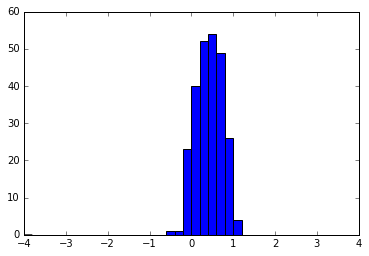

In [102]:
def plot_score(id):
    bins=40
    plt.hist(mc.trace("skill%i"%id)[:], bins=bins, range=(-4,4))
    

prediction(1,3)  
prediction(0,10)
prediction(15,20)

plot_score(1)